# Stock Price Prediction

### Importing data

In [1]:
import yfinance as yf

In [2]:
# getting data
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = 'AAPL'
apple_data = yf.download(stock, start, )

[*********************100%***********************]  1 of 1 completed


### Basic EDA

In [4]:
apple_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2004-10-26 00:00:00+00:00,0.723384,0.856607,0.858036,0.838750,0.847321,594361600
2004-10-27 00:00:00+00:00,0.758519,0.898214,0.903929,0.860179,0.866250,1193494400
2004-10-28 00:00:00+00:00,0.787021,0.931964,0.932500,0.883929,0.892500,864264800
2004-10-29 00:00:00+00:00,0.790187,0.935714,0.950000,0.925000,0.925714,810219200
2004-11-01 00:00:00+00:00,0.790941,0.936607,0.951071,0.929286,0.937500,602050400


In [5]:
apple_data.shape

(5035, 6)

In [6]:
apple_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,49.407504,51.126205,51.635001,50.569633,51.091871,3.926211e+08
std,61.037690,61.044296,61.635385,60.386356,60.990071,3.985004e+08
min,0.723384,0.856607,0.858036,0.838750,0.847321,2.404830e+07
25%,5.855380,6.933750,7.014643,6.828571,6.946607,1.026034e+08
50%,21.914984,24.301430,24.492500,24.055000,24.292500,2.396576e+08
75%,58.387243,60.177500,61.005001,59.252499,60.013750,5.658464e+08
max,236.479996,236.479996,237.490005,234.449997,236.479996,3.372970e+09


In [7]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2004-10-26 00:00:00+00:00 to 2024-10-25 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  5035 non-null   float64
 1   (Close, AAPL)      5035 non-null   float64
 2   (High, AAPL)       5035 non-null   float64
 3   (Low, AAPL)        5035 non-null   float64
 4   (Open, AAPL)       5035 non-null   float64
 5   (Volume, AAPL)     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [8]:
apple_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


Text(0.5, 1.0, 'Closing Price of Apple')

<Figure size 1500x500 with 0 Axes>

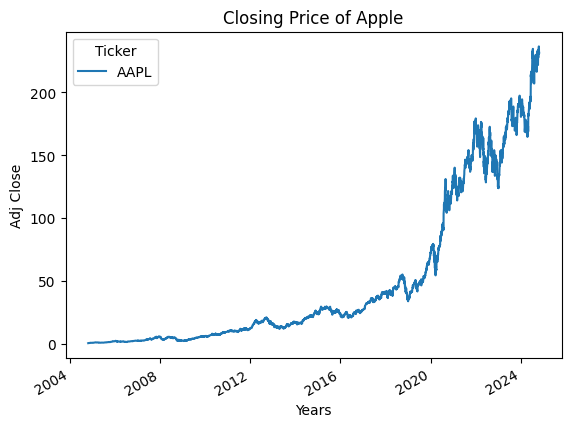

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,5))
apple_data['Adj Close'].plot()
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.title('Closing Price of Apple')

In [10]:
def plotGraph(figsize, values, column_name):
  plt.figure(figsize = figsize)
  values.plot()
  plt.xlabel('Years')
  plt.ylabel(column_name)
  plt.title(f"{column_name} of Apple")

In [11]:
apple_data.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

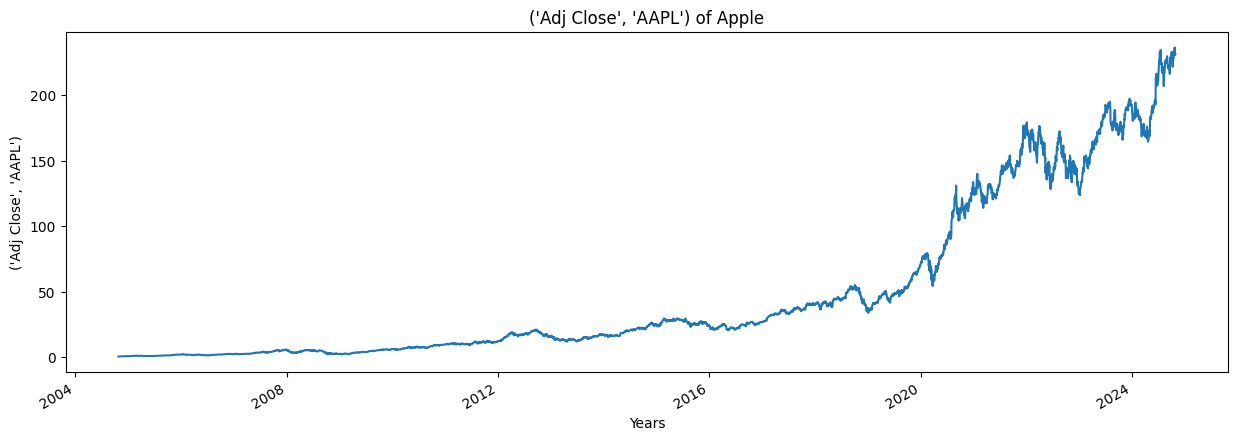

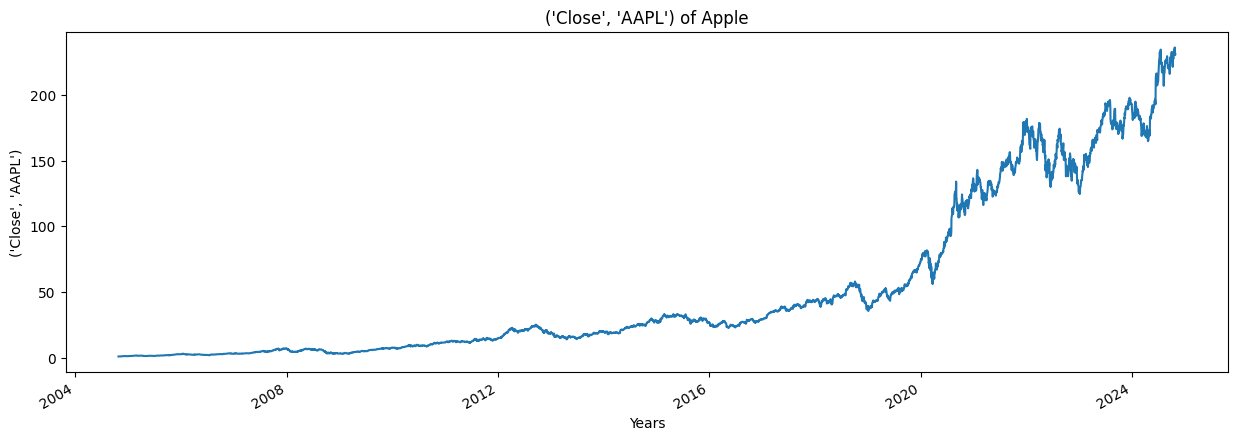

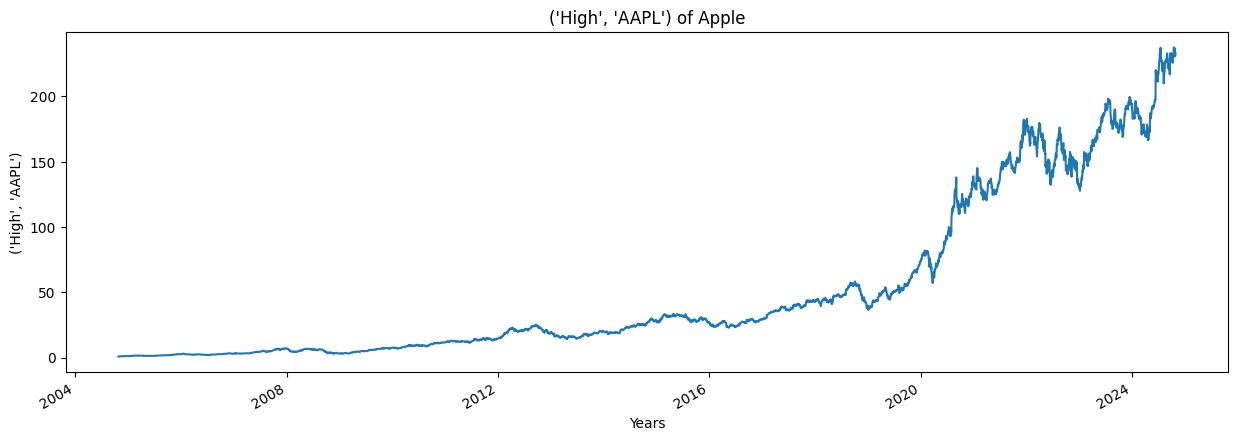

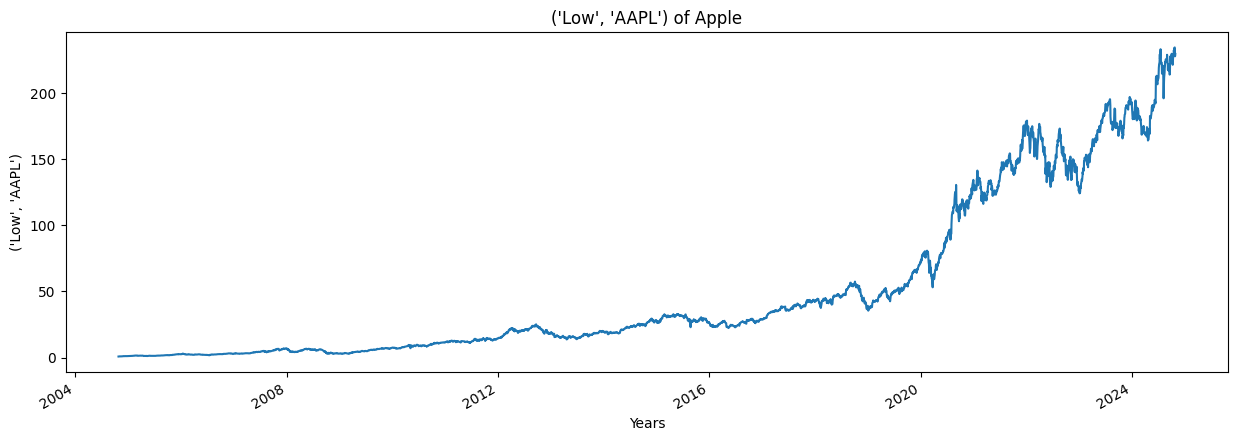

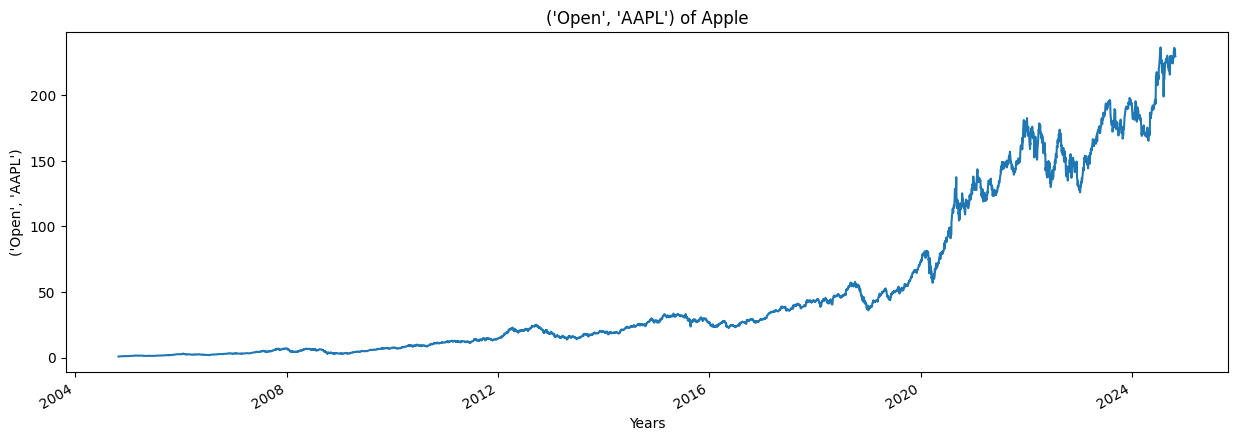

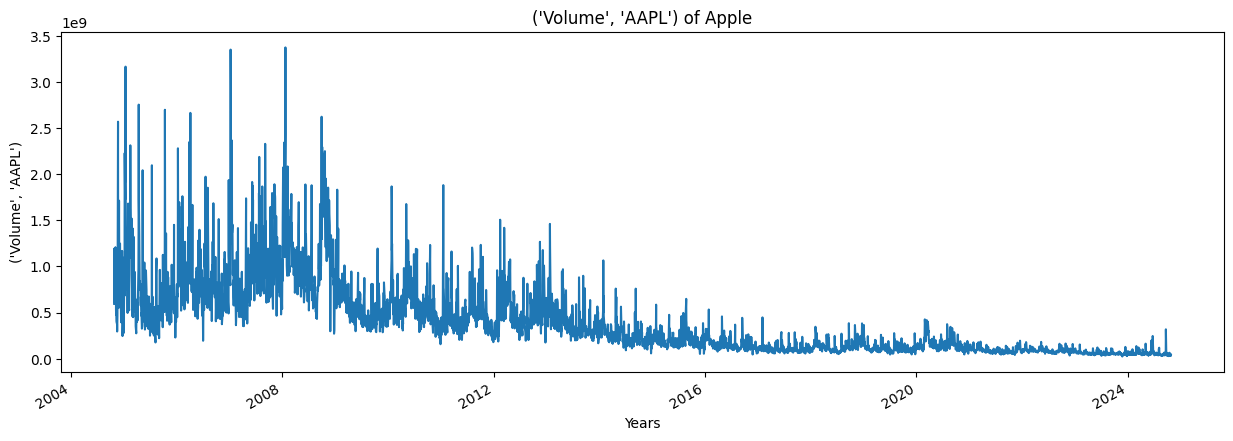

In [12]:
for column in apple_data.columns:
  plotGraph((15,5), apple_data[column], column)

In [13]:
for i in range(2004, 2024):
  print(i, list(apple_data.index.year).count(i))

2004 47
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [14]:
# moving average for 250 days
apple_data['MA_for_250_days'] = apple_data['Adj Close'].rolling(250).mean()

In [15]:
apple_data['MA_for_250_days'][0:250]

,MA_for_250_days
Date,
2004-10-26 00:00:00+00:00,NaN
2004-10-27 00:00:00+00:00,NaN
2004-10-28 00:00:00+00:00,NaN
2004-10-29 00:00:00+00:00,NaN
2004-11-01 00:00:00+00:00,NaN
...,...
2005-10-14 00:00:00+00:00,NaN
2005-10-17 00:00:00+00:00,NaN
2005-10-18 00:00:00+00:00,NaN


<Figure size 1500x500 with 0 Axes>

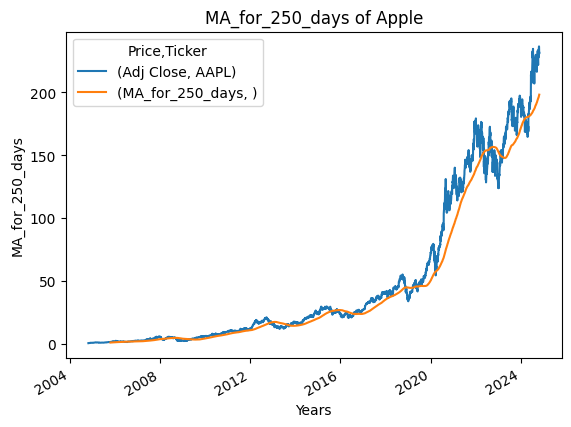

In [16]:
plotGraph((15,5), apple_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

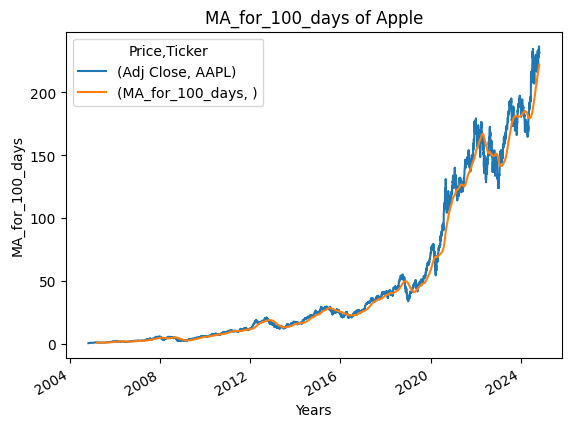

In [17]:
# moving average for 100 days
apple_data['MA_for_100_days'] = apple_data['Adj Close'].rolling(100).mean()
plotGraph((15,5), apple_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 1500x500 with 0 Axes>

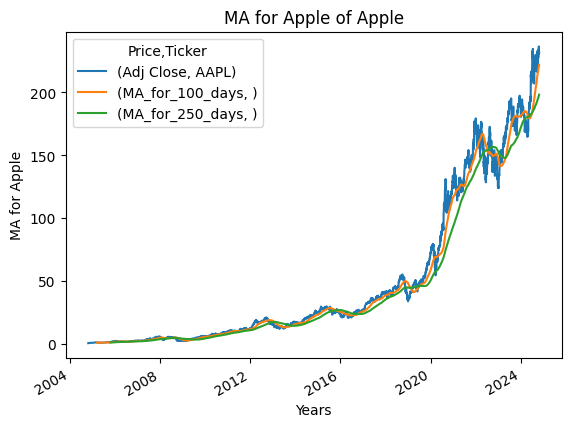

In [18]:
plotGraph((15,5), apple_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA for Apple')

In [19]:
# percentage change each day
apple_data['Percentage_change'] = apple_data['Adj Close'].pct_change()
apple_data[['Adj Close','Percentage_change']].head()

Price,Adj Close,Percentage_change
Ticker,AAPL,
Date,,
2004-10-26 00:00:00+00:00,0.723384,NaN
2004-10-27 00:00:00+00:00,0.758519,0.048571
2004-10-28 00:00:00+00:00,0.787021,0.037575
2004-10-29 00:00:00+00:00,0.790187,0.004024
2004-11-01 00:00:00+00:00,0.790941,0.000954


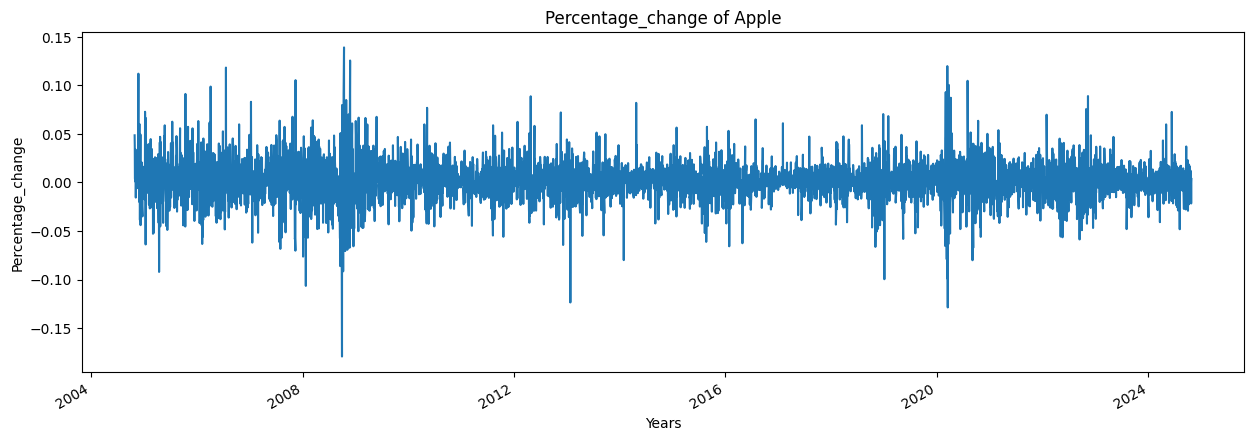

In [20]:
plotGraph((15,5), apple_data['Percentage_change'], 'Percentage_change')

### Preprocessing the Data

In [21]:
# getting the min and max
Adj_close_price = apple_data[['Adj Close']]
max(Adj_close_price.values),min(Adj_close_price.values)

(array([236.47999573]), array([0.72338361]))

In [22]:
from sklearn.preprocessing import MinMaxScaler

# making the range 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00000000e+00],
       [1.49033979e-04],
       [2.69926759e-04],
       ...,
       [9.75737685e-01],
       [9.74931823e-01],
       [9.78494804e-01]])

In [23]:
len(scaled_data)

5035

In [24]:
# creating X and y data
X = []
y = []

for i in range(100, len(scaled_data)):
    X.append(scaled_data[i-100:i])
    y.append(scaled_data[i])

import numpy as np
X, y = np.array(X), np.array(y)

In [25]:
X[0], y[0]

(array([[0.        ],
        [0.00014903],
        [0.00026993],
        [0.00028336],
        [0.00028656],
        [0.00035372],
        [0.0004695 ],
        [0.00041448],
        [0.00043176],
        [0.00041001],
        [0.0003889 ],
        [0.00043368],
        [0.00046886],
        [0.00048165],
        [0.00046502],
        [0.00044583],
        [0.00044327],
        [0.00047461],
        [0.00046054],
        [0.00085584],
        [0.00085072],
        [0.00102854],
        [0.00106052],
        [0.00130934],
        [0.00122043],
        [0.00126777],
        [0.00110274],
        [0.00094091],
        [0.0011392 ],
        [0.00095434],
        [0.00097929],
        [0.0010247 ],
        [0.0010989 ],
        [0.00108355],
        [0.00110786],
        [0.00110594],
        [0.00119165],
        [0.00108867],
        [0.00094347],
        [0.00100551],
        [0.00100935],
        [0.00102598],
        [0.00097161],
        [0.00103685],
        [0.00105348],
        [0

Splitting the Data

In [26]:
print(len(X))

4935


In [28]:
splitting_len = int(len(X)*0.7)
X_train = X[:splitting_len]
y_train = y[:splitting_len]

X_test = X[splitting_len:]
y_test = y[splitting_len:]

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454, 1)
(1481, 100, 1)
(1481, 1)


### Model Building

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [31]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

In [33]:
model.fit(X_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 297s 85ms/step - loss: 1.4414e-04 - mean_absolute_error: 0.0067
Epoch 2/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 335s 89ms/step - loss: 3.0243e-05 - mean_absolute_error: 0.0037


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

### Making Predictions

In [35]:
prediction = model.predict(X_test)
prediction

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step


array([[0.17531067],
       [0.17106815],
       [0.1683961 ],
       ...,
       [0.8877616 ],
       [0.880882  ],
       [0.8745407 ]], dtype=float32)

In [38]:
prediction = scaler.inverse_transform(prediction)
y_test = scaler.inverse_transform(y_test)

In [37]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, prediction, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 11.023665589150495


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Plotting the predictions

<Figure size 1500x600 with 0 Axes>

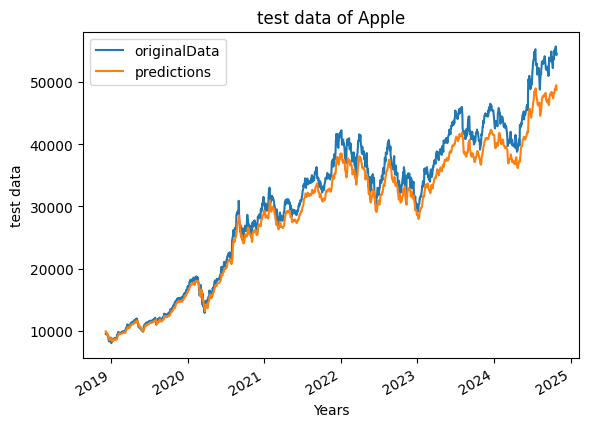

In [40]:
import pandas as pd
plottingData = pd.DataFrame(
 {
  'originalData': y_test.reshape(-1),
  'predictions': prediction.reshape(-1)
 } ,
    index = apple_data.index[splitting_len+100:]
)
plottingData.head()

plotGraph((15,6), plottingData, 'test data')

In [43]:
# saving the model
from keras.models import load_model

model.save("Stock_price_model.keras")